In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from joblib import dump, load
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('08-09.csv')
df.head()

,Unnamed: 0,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,STL,BLK,BLKA,PF,PFD,PTD,Year,Conference,Playoffs,Championship
0,0,Cleveland Cavaliers,82,66,16,0.805,48.2,100.3,36.9,78.7,...,7.2,5.3,4.1,20.3,20.3,8.9,2008,Eastern,1,0
1,1,Los Angeles Lakers,82,65,17,0.793,48.2,106.9,40.3,85.1,...,8.8,5.1,4.8,20.7,22.1,7.7,2008,Western,1,1
2,2,Boston Celtics,82,62,20,0.756,48.5,100.9,37.5,77.2,...,7.6,4.7,4.7,23.1,22.2,7.5,2008,Eastern,1,0
3,3,Orlando Magic,82,59,23,0.720,48.1,101.0,35.7,78.2,...,7.0,5.4,3.8,20.3,22.4,6.7,2008,Eastern,1,0
4,4,Denver Nuggets,82,54,28,0.659,48.1,104.3,37.3,79.4,...,8.7,6.0,5.5,22.9,23.7,3.4,2008,Western,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   TEAM          30 non-null     object 
 2   GP            30 non-null     int64  
 3   W             30 non-null     int64  
 4   L             30 non-null     int64  
 5   WIN%          30 non-null     float64
 6   MIN           30 non-null     float64
 7   PTS           30 non-null     float64
 8   FGM           30 non-null     float64
 9   FGA           30 non-null     float64
 10  FG%           30 non-null     float64
 11  3PM           30 non-null     float64
 12  3PA           30 non-null     float64
 13  3P%           30 non-null     float64
 14  FTM           30 non-null     float64
 15  FTA           30 non-null     float64
 16  FT%           30 non-null     float64
 17  OREB          30 non-null     float64
 18  DREB          30 non-null     fl

## EDA

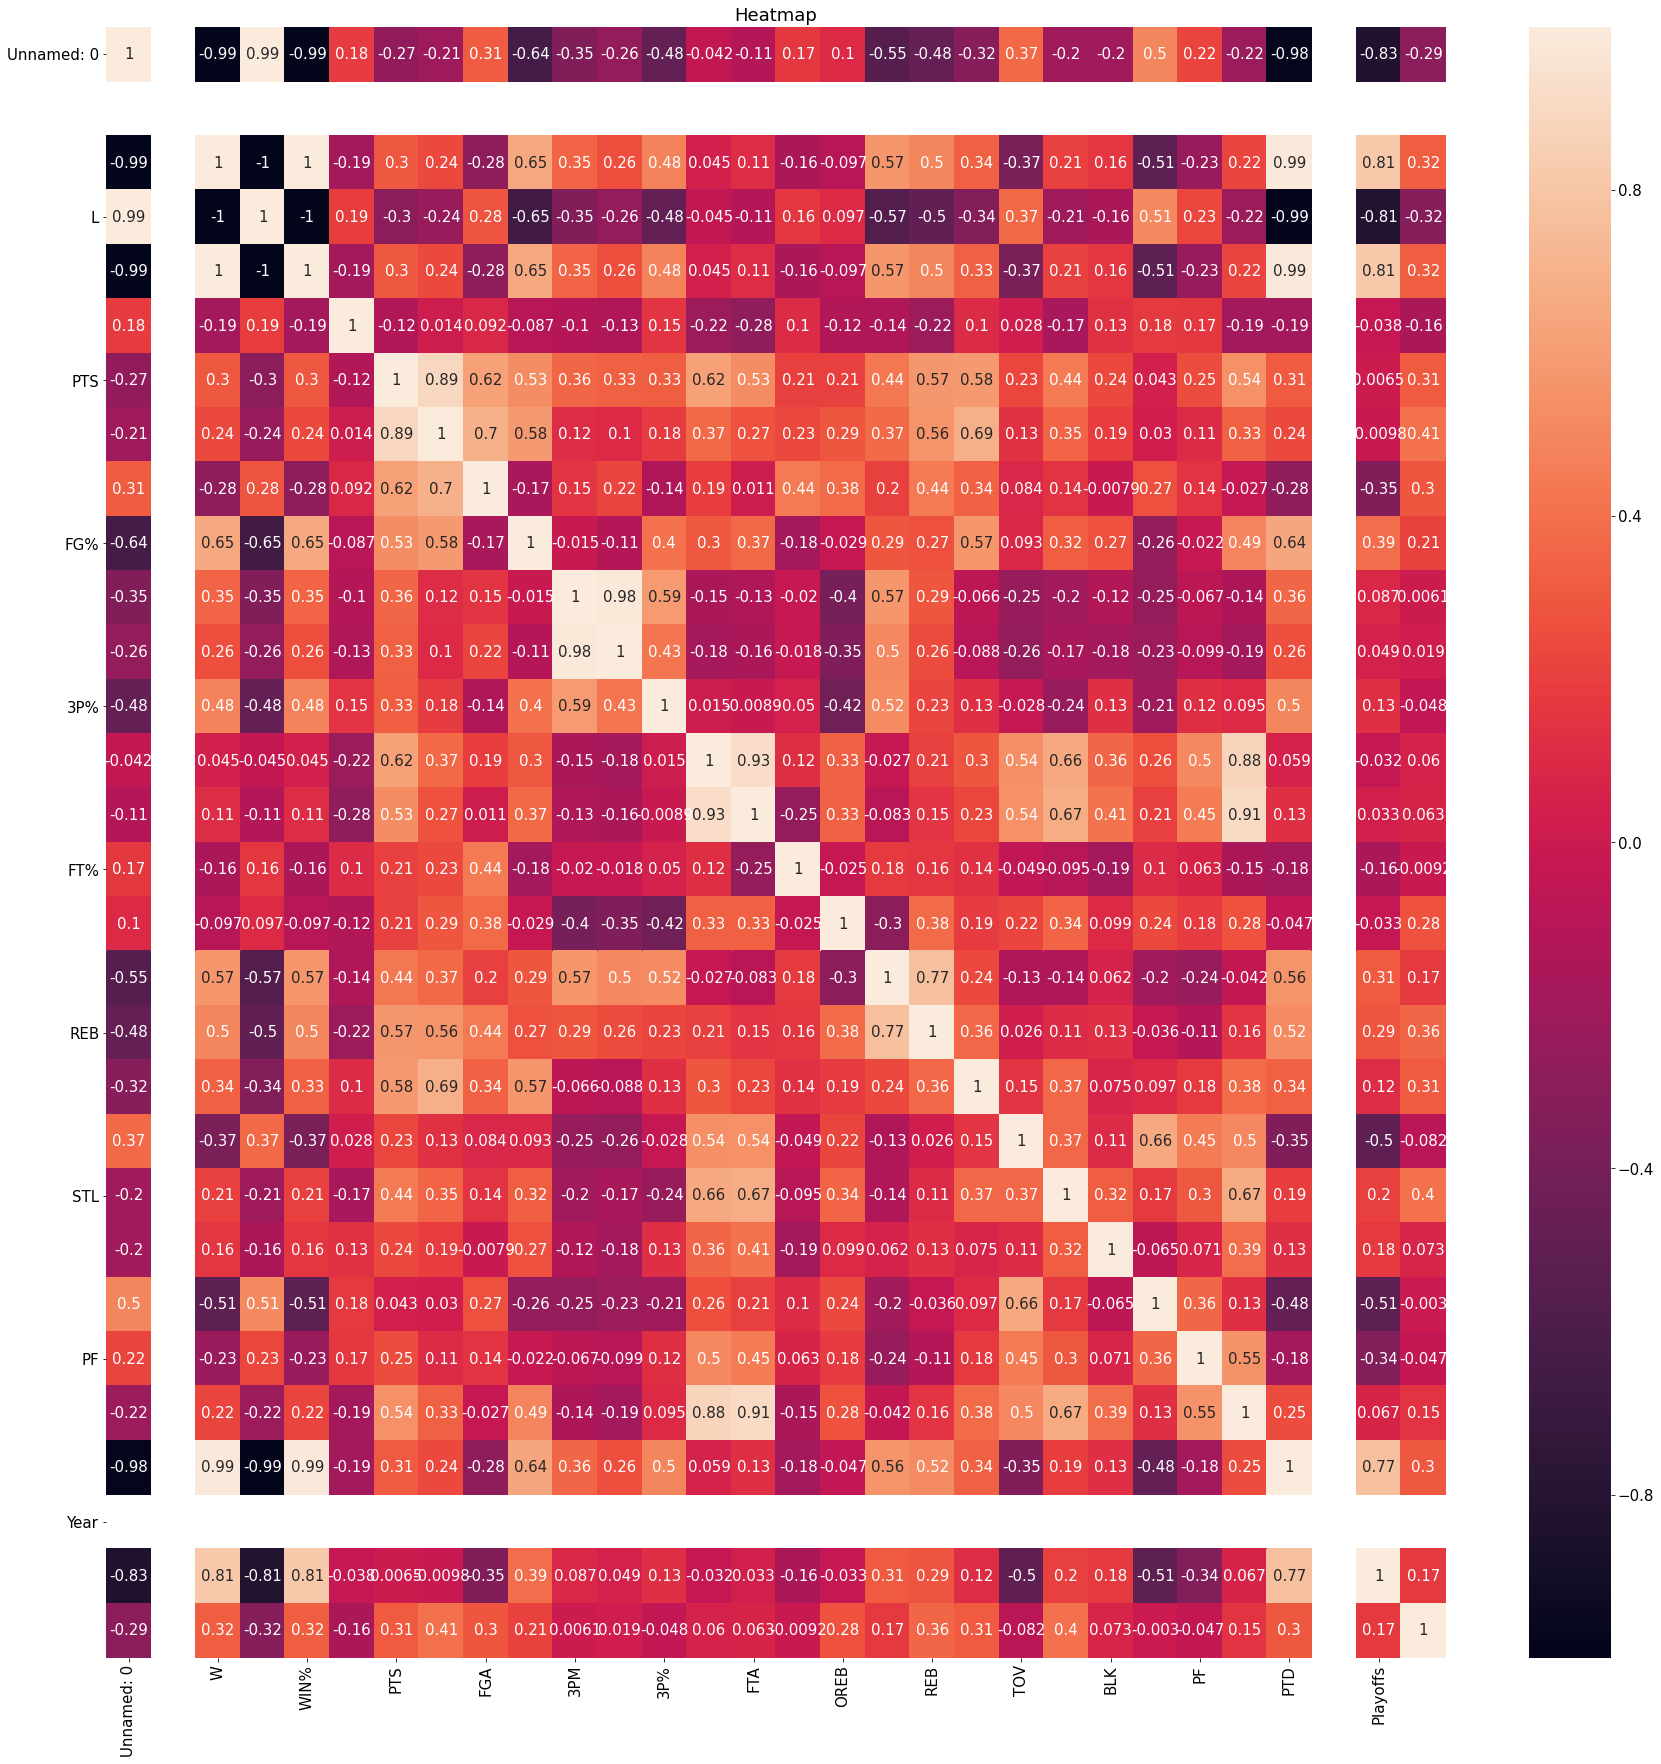

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap')
plt.rcParams.update({'font.size': 15})
fig = plt.gcf()
fig.set_size_inches(30, 30)
plt.show()

## Random Forest Regression

In [6]:
target_column = 'WIN%'
feature_columns = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD']
y = df[target_column]
X = df[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0, test_size = 10/30)

In [7]:
start = time.time()
print('start')
print()
rfr_param_grid = {'n_estimators':[10,50,100,200,500], 'max_depth': [1,2,3,4,5,6]}
rfr = RandomForestRegressor(random_state=0)
grid_rfr = GridSearchCV(rfr, param_grid=rfr_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rfr.fit(X_train, y_train)
grid_rfr_mse_train = grid_rfr.score(X_train, y_train)
grid_rfr_mse = grid_rfr.score(X_test, y_test)
print('Best Parameters:', grid_rfr.best_params_)
print()
print('Train MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse_train)
print()
print('Test MSE score for the Random Forest Regression Model with the best parameters above: %.4f' % grid_rfr_mse)
print()
print('end')
print()
end = time.time()
print(end - start)

start

Best Parameters: {'max_depth': 4, 'n_estimators': 50}

Train MSE score for the Random Forest Regression Model with the best parameters above: -0.0024

Test MSE score for the Random Forest Regression Model with the best parameters above: -0.0259

end

26.6127188205719


In [8]:
rfr_best_param_model = RandomForestRegressor(n_estimators=50, max_depth=4, random_state=0)
rfr_best_param_model.fit(X_train, y_train)
rfr_best_param_model_predictions = rfr_best_param_model.predict(X_test)
print('Mean Squared Error with the Best Parameters From Above:', mean_squared_error(y_true=y_test,y_pred=rfr_best_param_model_predictions))

Mean Squared Error with the Best Parameters From Above: 0.025874773545701918


In [10]:
df_feature_importances = pd.DataFrame(rfr_best_param_model.feature_importances_, 
                                      index = X_train.columns, 
                                      columns = ['Importance']).sort_values('Importance', ascending = False).reset_index()
df_feature_importances

,index,Importance
0,DREB,0.244623
1,REB,0.177522
2,FG%,0.138319
3,BLKA,0.072114
4,PF,0.069600
5,3PM,0.061864
6,3PA,0.049938
7,FGA,0.042019
8,FT%,0.023010
9,TOV,0.019586


In [13]:
dump(rfr_best_param_model,filename='2008-2009 Random Forest Regressor.joblib')

['2008-2009 Random Forest Regressor.joblib']